In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

2023-10-10 13:45:11.349413: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-10 13:45:13.680232: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-10 13:45:13.680310: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-10 13:45:13.695617: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-10 13:45:14.606115: I tensorflow/core/platform/cpu_feature_g

##### AUTO REGRESSIVE MODEL

In [3]:
# Generate data from autoregressive model
def generate(n_smaples):
    data = []
    for i in range(n_smaples):
        if i == 0:
            data.append(np.random.uniform(0, 0.1))
        elif i == 1:
            data.append(np.random.uniform(0, 0.1))
        elif i == 2:
            data.append(np.random.uniform(0, 0.1))
        else:
            data.append(0.6*data[i-1]-0.5*data[i-2]-0.2*data[i-3]+np.random.uniform(0, 0.1))
    return data

##### GENERATING THE TRAIN AND TEST DATA

In [4]:
samples = generate(4006)
train_data = samples[:2003]
test_data = samples[2003:]

In [5]:
X_train = np.array([train_data[i:i+3] for i in range(len(train_data)-3)])
y_train = np.array([train_data[i+3] for i in range(len(train_data)-3)])
X_test = np.array([test_data[i:i+3] for i in range(len(test_data)-3)])
y_test = np.array([test_data[i+3] for i in range(len(test_data)-3)])
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 3, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 3, 1))
print(X_train.shape)
print(X_test.shape)
# Reshape output to be [samples, time steps, features]
y_train = np.reshape(y_train, (y_train.shape[0], 1))
y_test = np.reshape(y_test, (y_test.shape[0], 1))
print(y_train.shape)
print(y_test.shape)

(2000, 3)
(2000,)
(2000, 3)
(2000,)
(2000, 3, 1)
(2000, 3, 1)
(2000, 1)
(2000, 1)


##### SIMPLE RNN TO MODEL THE AUTO REGRESSIVE MODEL

In [6]:
def RNN(n_layers, activation, n_neurons, X_train, y_train, X_test, y_test, n_epochs, batch_size):
    # Build RNN model
    model = Sequential()
    for i in range(n_layers-1):
        model.add(SimpleRNN(n_neurons, activation=activation, return_sequences=True))
    model.add(SimpleRNN(n_neurons, activation=activation))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    # Train RNN model
    model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, verbose=0)
    # Plot MSE vs Epochs
    plt.plot(model.history.history['loss'])
    plt.title('MSE vs Epochs')
    plt.ylabel('MSE')
    plt.xlabel('Epochs')
    plt.show()
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('MSE: ', mse)
    print('MAE: ', mae)
    print('R2: ', r2)

No.of layers =  1


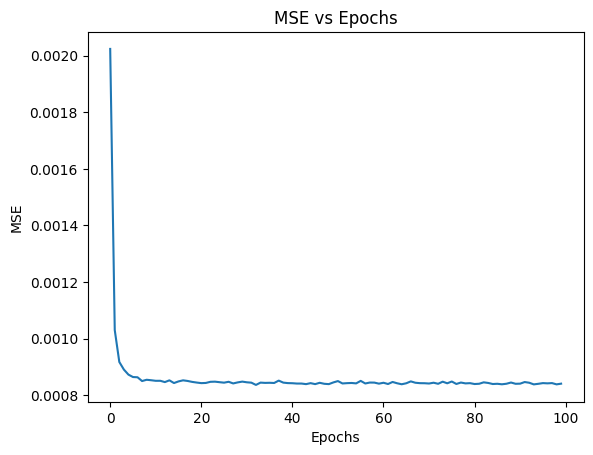

63/63 [==============================] - 0s 2ms/step
MSE:  0.0008569727432620986
MAE:  0.025390606583853812
R2:  0.5413956542042477

No.of layers =  2


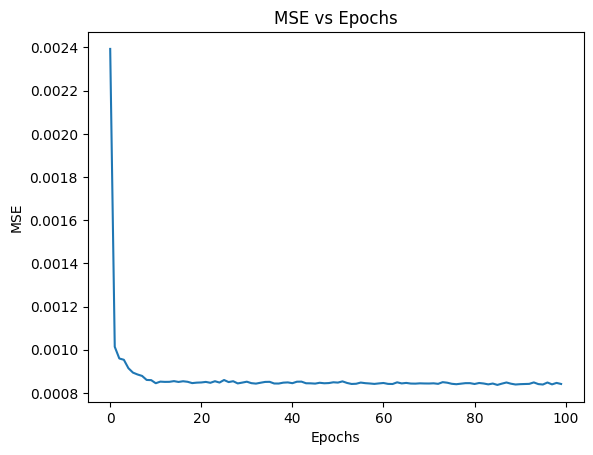

63/63 [==============================] - 0s 2ms/step
MSE:  0.0008500196185852682
MAE:  0.025277224160632515
R2:  0.5451165814084387

No.of layers =  3


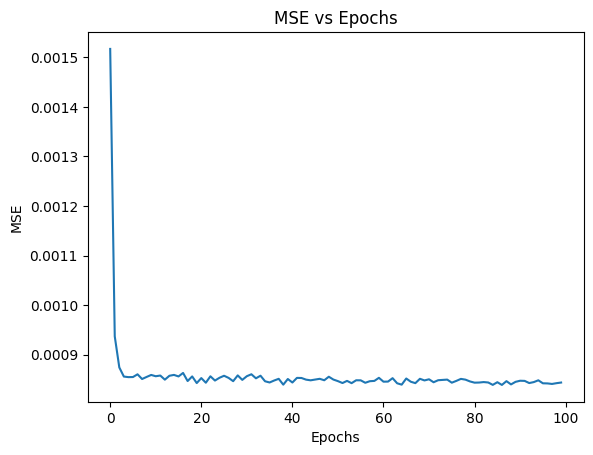

63/63 [==============================] - 1s 2ms/step
MSE:  0.0008542679212366728
MAE:  0.02531229058942585
R2:  0.5428431251363366



In [13]:
for i in range(1,4):
    print("No.of layers = ", i)
    RNN(i, 'tanh',3, X_train, y_train, X_test, y_test, 100, 10)
    print()

##### Architecture of the model
- Number of neurons in the hidden layer: 3
- Activation function: tanh
- Optimizer: Adam
- Loss function: MSE
- Epochs: 100
- Batch size: 10
- Number of training samples: 2000
- Number of test samples: 2000
- Number of time steps: 3
- Number of features: 1

##### Observations
- By varying number of hidden layers, there is no much change in performance of the model.
- For no.of.hidden layers = 1, R2:  0.5413956542042477
- For no.of.hidden layers = 2, R2:  0.5451165814084387
- For no.of.hidden layers = 3, R2:  0.5428431251363366